# R laboratory exercises 04
### Laboratory session: April 21, 2021
### Exercises due on: May 9, 2021

#### Samuele Piccinelli, 2027650
#### samuele.piccinelli@studenti.unipd.it

In [1]:
# import libraries and useful dependencies
library(ggplot2)
library(latex2exp)
library(data.table)
# plot settings
options(repr.plot.width=10, repr.plot.height=5)
theme_set(theme_bw() + theme(text=element_text(family='Times New Roman', size=12), legend.text=element_text(size=12)))
# set random seed
set.seed(20160715)

#### Exercise 1 - Six Boxes Toy Model : inference
The six boxes toy model is described [here](https://arxiv.org/pdf/1701.01143.pdf).
Labeling the boxes as follows
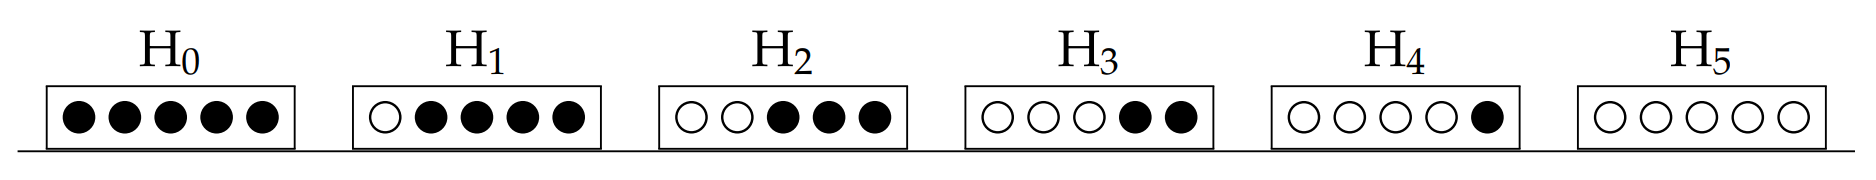
write a program in _R_ that:
1. Allows the user to insert the color of a randomly extracted box.
2. Prints on the standard output the probability of selecting each box.
3. Plots the probability for each box as a function of the extraction step.

***
Some code is taken from the source listed and from [here](https://arxiv.org/pdf/1612.05292.pdf).

As an example, for balls extracted from box # 4 (unkonwn to the player), one could try the following 25-digit long sequence:
<h4><center>0 - 1 - 0 - 1 - 1 - 1 - 0 - 1 - 0 - 1 - 1 - 1 - 1 - 1 - 1 - 0 - 1 - 1 - 1 - 1 - 1 - 0 - 1 - 1 - 1</center></h4>

In [2]:
cat('\t 1 -> White\t 0 -> Black\t q -> quit\n\n')

N <- 5; i <- 0:N; pii <- i/N
# allocate empy arry for extracted seq and P(Bi|seq)
extracted <- NULL; PBi <- NULL
nt <- 0
color <- readline(prompt='Enter colors:\n\n')
while (color!='q'){
    nt <- nt+1
    extracted <- append(extracted,as.numeric(color))
    x <- sum(extracted)
    PBi <- append(PBi, pii^x * (1-pii)^(nt-x) / sum( pii^x * (1-pii)^(nt-x) ))
    color <- readline()
}
cat('\n',nt,'total extractions')

	 1 -> White	 0 -> Black	 q -> quit

Enter colors:

0
1
0
1
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
q

 25 total extractions

In [3]:
PBi_t <- matrix(PBi, nrow = nt, ncol = 6, byrow=TRUE)
PBi_t <- cbind(PBi_t, 1:nt)
colnames(PBi_t) <- c(0:N, 'NumTrial') # box index + number of trial
head(PBi_t)

PBi_t <- data.table(PBi_t) # to data table
PBi_t <- reshape2::melt(PBi_t, id='NumTrial') # to plot

0,1,2,3,4,5,NumTrial
0.3333333,0.26666667,0.2000000,0.1333333,0.06666667,0,1
0.0000000,0.20000000,0.3000000,0.3000000,0.20000000,0,2
0.0000000,0.32000000,0.3600000,0.2400000,0.08000000,0,3
0.0000000,0.15384615,0.3461538,0.3461538,0.15384615,0,4
0.0000000,0.06153846,0.2769231,0.4153846,0.24615385,0,5
0.0000000,0.02162162,0.1945946,0.4378378,0.34594595,0,6


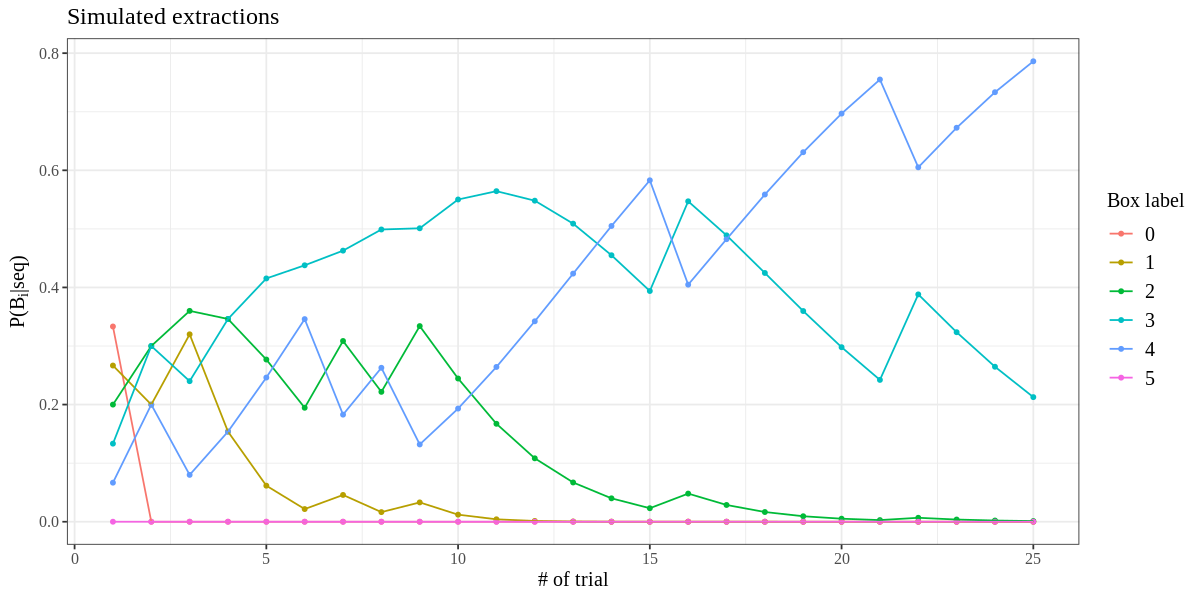

In [4]:
ggplot(PBi_t, aes(NumTrial, value, col=variable)) + geom_point(size=1) + geom_line() +
labs(title='Simulated extractions', x='# of trial', y=TeX('$P(B_i|seq)$'), col='Box label')

Es expected, the probability shifts noticeably towards higher values for box # 4.

#### Exercise 2 - Six Boxes Toy Model : simulation
Consider again the six boxes toy model of the previous exercise and write a simulation program that:
1. Selects a random box.
2. Makes random sampling from the box.
3. Prints on the standard output the probability of selecting each box.
4. Plots the probability for each box as a function of the number of trial.

In [5]:
N <- 5; i <- 0:N; pii <- i/N; n <- 100

ri <- sample(i, 1) # extract one box to sample from, unknown to the player

In [6]:
s <- rbinom(n,1,pii[ri+1])
x <- sum(s) # nr of white
PBi <- pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) # belief to have picked Bi
PEw <- sum( pii * PBi ) # belief to get white in a further extraction
cat('The probability for box',which(PBi==max(PBi))-1,'is',round(max(PBi)*100,2),
    '%; the probability of getting white in the',n+1,'extraction is',round(PEw*100,2),'%')

The probability for box 4 is 99.97 %; the probability of getting white in the 101 extraction is 79.99 %

In [7]:
css <- cumsum(s) # cumulative sum of white balls
# allocate an empty matrix: belief to have picked Bi (columns) with each extraction (rows)
PBi_t <- matrix(, nrow = 100, ncol = 6)
for (i in 1:100){
    PBi_t[i,] <- pii^css[i] * (1-pii)^(i-css[i]) / sum( pii^css[i] * (1-pii)^(i-css[i]) )
}
PBi_t <- cbind(PBi_t, 1:n)
colnames(PBi_t) <- c(0:N, 'NumTrial') # box index + number of trial

In [8]:
PBi_t <- data.table(PBi_t) # to data table
PBi_t <- reshape2::melt(PBi_t, id='NumTrial') # to plot

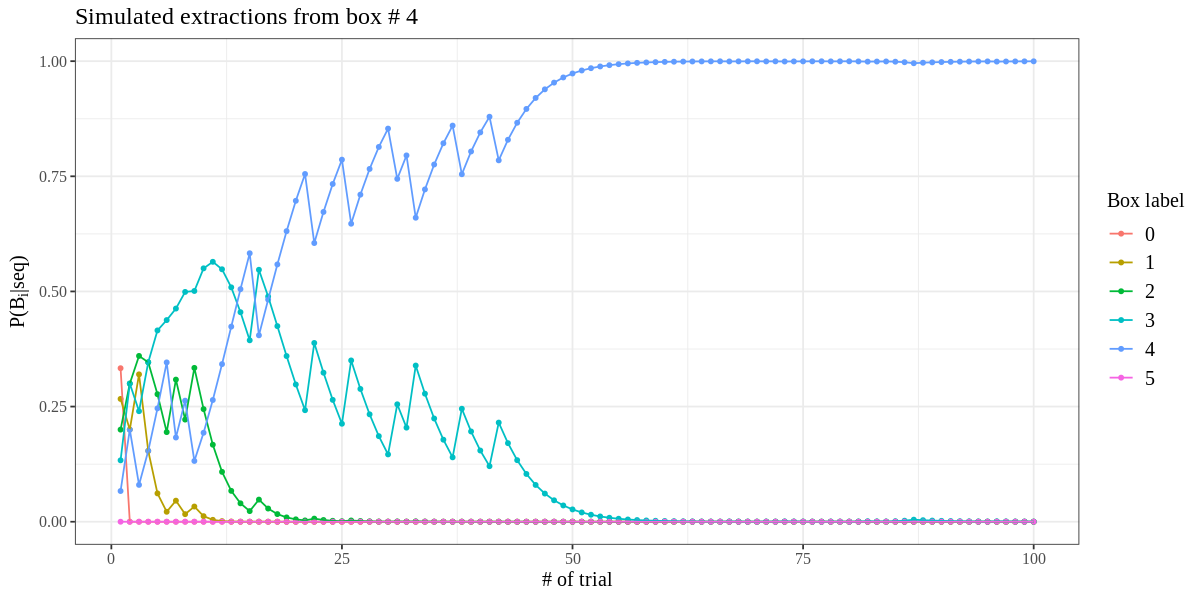

In [9]:
ggplot(PBi_t, aes(NumTrial, value, col=variable)) + geom_point(size=1) + geom_line() +
labs(title=paste('Simulated extractions from box #',ri), x='# of trial', y=TeX('$P(B_i|seq)$'), col='Box label')

#### Exercise 3
An important property of the gamma distribution is the so-called _reproductive property_: given a sequence of independent random variable $X_j ∼ Gamma(\alpha_j, \beta)$, it follows that
$$\mathcal{Y}=\sum^n_{j=1} X_j \rightarrow \mathcal{Y} \sim Gamma(\alpha, \beta) \text{ where } \alpha = \sum^n_{j=1} \alpha_j$$.
If $\alpha = m$ is an integer, a random variable from gamma distribution $Gamma(m, \beta)$ (also known as **Erlang distribution**) can be obtained by summing $m$ independent exponential random variables $X_j\sim Exp(\beta)$:
$$\mathcal{Y}=\beta \sum^m_{j=1}\left(-\ln \mathcal{U}_j\right)=-\beta \ln \prod^m_{j=1} \mathcal{U}_j$$
Write an algorithm to sample variables from an Erlang distribution $Gamma(m, \beta)$.

In [10]:
Y <- function(m,beta){
    return(-beta*log(prod(runif(m))))
}

rexp_sum <- function(m){
    return(sum(rexp(m)))
}

m <- 10; n <- 1000; beta <- 1
rG_fromU <- data.table('rG_fromU' = replicate(n, Y(m,beta), simplify=TRUE))
rG_fromExp <- data.table('rG_fromExp' = replicate(n, rexp_sum(m), simplify=TRUE))

x <- seq(0,25,0.1); bins <- 25

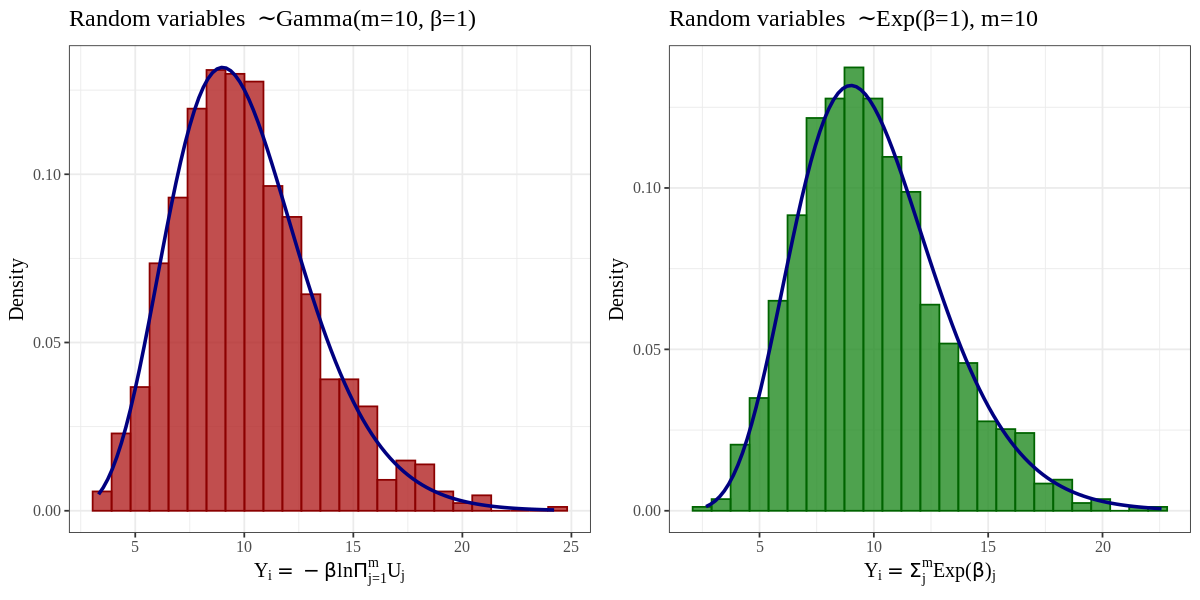

In [11]:
options(repr.plot.width=10, repr.plot.height=5)
plt_unif <- ggplot(rG_fromU, aes(x=rG_fromU)) +
geom_histogram(aes(y=..density..), bins=bins, color='darkred', fill='firebrick', alpha=0.8) +
labs(title=TeX('Random variables $\\sim Gamma(m=10$, $β=1)$'), x=TeX('$Y_i = -\\beta \\ln \\Pi^m_{j=1} U_j$'), y='Density') +
stat_function(fun = function(x) {dgamma(x,m,beta)}, color = 'navy', size=1)

plt_exp <- ggplot(rG_fromExp, aes(x=rG_fromExp)) +
geom_histogram(aes(y=..density..), bins=bins, color='darkgreen', fill='forestgreen', alpha=0.8) +
labs(title=TeX('Random variables $\\sim Exp(β=1)$, $m=10$'), x=TeX('$Y_i = \\Sigma^m_j Exp(\\beta)_j$'), y='Density') +
stat_function(fun = function(x) {dgamma(x,m,beta)}, color = 'navy', size=1)

gridExtra::grid.arrange(plt_unif, plt_exp, ncol = 2, nrow = 1)

#### Exercise 4
One of the first random number generator was proposed by von Neumann, the so-called **middle square algorithm**.<br>
Write _R_ code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number.

_Suggestion_: after having squared the number, convert it to a list of characters through `number <- unlist(strsplit(as.character(x.squared),''))`; after having removed the head and tail of the list, convert it back to a number through `as.numeric(paste(number.after.trimming, collapse=''))`.

In [12]:
numFigure <- function(num){ # find number of digits of a given number
    return(floor(log10(num))+1)
}

midSquareRand <- function(seed, n){
    random.vector <- NULL
    if (numFigure(seed)%%2==0){
        cat('Please enter a seed with an uneven number of digits!\n')
        stop
    }
    else{
        seed.len <- numFigure(seed)
        # works for seeds with an uneven number of digits
        shift <- (numFigure(seed)-1)*0.5
        for(i in 1:n){
            x.squared <- seed**2
            x2.as.chr <- unlist(strsplit(as.character(x.squared),''))
            middle <- ceiling(numFigure(x.squared)/2) # finds middle digit of new number
            new <- x2.as.chr[(middle-shift):(middle+shift)] # remove leading and trailing digits

            seed <- as.numeric(paste(new, collapse='')) # collapse it back to number, define new seed
            random.vector <- append(random.vector, seed) # append to returned list
        }   
    }
    return(random.vector)
}

In [13]:
N <- 1e4; seed <- 1234567
# generates number with the middle square algorithm
MS <- midSquareRand(seed=seed, n=N)
# generates number with the Mersenne-Twister algorithm
set.seed(seed=seed, kind='Mersenne-Twister')
MT <- runif(N)

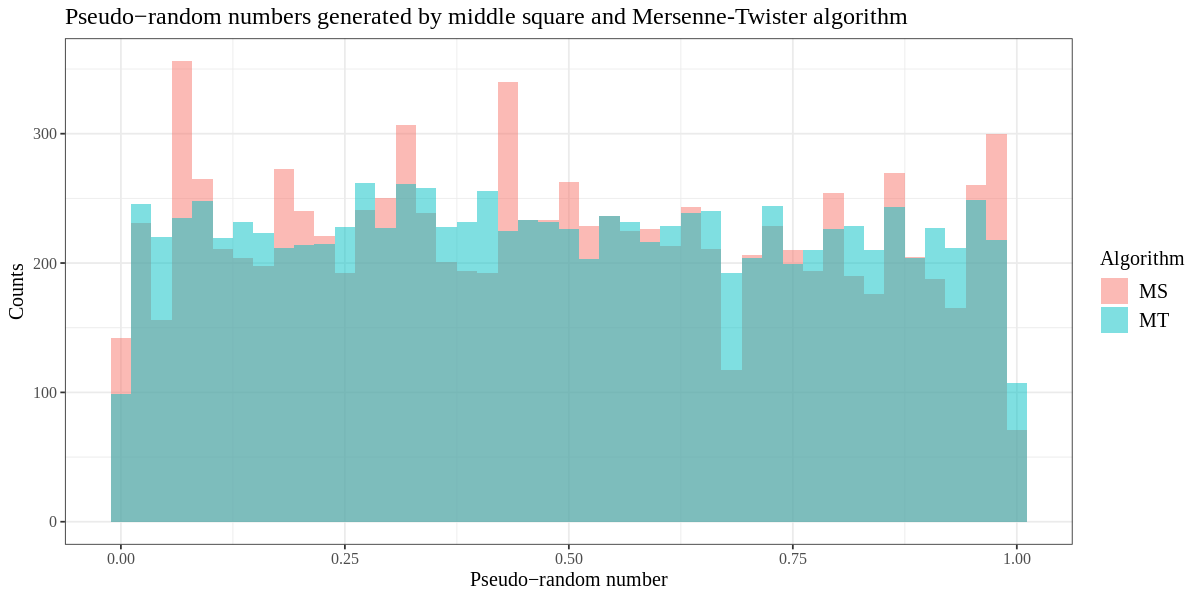

In [14]:
rNum <- rbind(data.table('rNum'=MS/max(MS), 'Algorithm'='MS'), data.table('rNum'=MT, 'Algorithm'='MT'))

ggplot(rNum, aes(x=rNum, fill=Algorithm)) +
geom_histogram(bins=45, alpha=0.5, position='identity') +
labs(title='Pseudo−random numbers generated by middle square and Mersenne-Twister algorithm',
     x='Pseudo−random number', y='Counts')

As one can see from the histograms above, the random numbers generated through middle square algorithm are not truly random: a better performance and a closer resemblance to the expected uniform distribution is given by the Mersenne-Twister algorithm.